<a href="https://colab.research.google.com/github/IIK99/Complete-A.I.---Machine-Learning--Data-Science-Bootcamp/blob/main/06%20Unstructured%20Data%20Project/end_to_end_dog_vision_gdrive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🐶 Using Transfer Learning and TensorFlow 2.0 to Classify Different Dog Breeds

Who's that doggy in the window?

Dogs are incredible. But have you ever been sitting at a cafe, seen a dog and not known what breed it is? I have. And then someone says, "it's an English Terrier" and you think, how did they know that?

In this project we're going to be using machine learning to help us identify different breeds of dogs.

To do this, we'll be using data from the Kaggle dog breed identification competition. It consists of a collection of 10,000+ labelled images of 120 different dog breeds.

This kind of problem is called multi-class image classification. It's multi-class because we're trying to classify mutliple different breeds of dog. If we were only trying to classify dogs versus cats, it would be called binary classification (one thing versus another).

Multi-class image classification is an important problem because it's the same kind of technology Tesla uses in their self-driving cars or Airbnb uses in atuomatically adding information to their listings.

Since the most important step in a deep learng problem is getting the data ready (turning it into numbers), that's what we're going to start with.

We're going to go through the following TensorFlow/Deep Learning workflow:

   1. Get data ready (download from Kaggle, store, import).
   2. Prepare the data (preprocessing, the 3 sets, X & y).
   3. Choose and fit/train a model (TensorFlow Hub, tf.keras.applications, TensorBoard, EarlyStopping).
   4. Evaluating a model (making predictions, comparing them with the ground truth labels).
   5. Improve the model through experimentation (start with 1000 images, make sure it works, increase the number of images).
   6. Save, sharing and reloading your model (once you're happy with the results).

For preprocessing our data, we're going to use TensorFlow 2.x. The whole premise here is to get our data into Tensors (arrays of numbers which can be run on GPUs) and then allow a machine learning model to find patterns between them.

For our machine learning model, we're going to be using a pretrained deep learning model from TensorFlow Hub.

The process of using a pretrained model and adapting it to your own problem is called transfer learning. We do this because rather than train our own model from scratch (could be timely and expensive), we leverage the patterns of another model which has been trained to classify images.

### Getting our workspace ready

Before we get started, since we'll be using TensorFlow 2.x and TensorFlow Hub (TensorFlow Hub), let's import them.

NOTE: Don't run the cell below if you're already using TF 2.x.


In [2]:
# Import TF 2.x
try:
  # %tensorflow_version only exists in Colab
  %tensorflow_version 2.x
except Exception:
  pass

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.




After restarting the runtime and rerunning the cell above, it tells us TensorFlow 2.x is selected.

**NOTE:** You may not need to do the above steps in the future when TensorFlow 2.x becomes the default in Colab.

Let's rerun some import statements. And check whether or not we're using a GPU.


In [3]:
import tensorflow as tf
import tensorflow_hub as hub

print("TF version:", tf.__version__)
print("Hub version:", hub.__version__)

# Check for GPU
print("GPU", "available (YESS!!!!)" if tf.config.list_physical_devices("GPU") else "not available :(")

TF version: 2.15.0
Hub version: 0.16.1
GPU available (YESS!!!!)




You might be wondering what a GPU is or why we need one. The short story is, a GPU is a computer chip which is faster at doing numerical computing. And since machine learning is all about finding patterns in numbers, that's what we're after.

Running this for the first time in Colab will let us know there's no GPU available.

This is because by default Colab runs on a computer located on Google's servers which doesn't have a GPU attached to it.

But we can fix this going to runtime and then changing the runtime type:

    1. Go to Runtime.
    2. Click "Change runtime type".
    3. Where it says "Hardware accelerator", choose "GPU" (don't worry about TPU for now but feel free to research them).
    4. Click save.
    5. The runtime will be restarted to activate the new hardware, so you'll have to rerun the above cells.
    6. If the steps have worked you should see a print out saying "GPU available".

If you want an example of how much a GPU speeds up computing, Google Colab have a demonstration notebook available.

### Getting data ready

Since much of machine learning is getting your data ready to be used with a machine learning model, we'll take extra care getting it setup.

There are a few ways we could do this. Many of them are detailed in the Google Colab notebook on I/O (input and output).

And because the data we're using is hosted on Kaggle, we could even use the Kaggle API.

This is great but what if the data you want to use wasn't on Kaggle?

One method is to upload it to your Google Drive, mount your drive in this notebook and import the file.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive

Following the prompts from the cell above, if everything worked, you should see a "drive" folder available under the Files tab.

This means we'll be able to access files in our Google Drive right in this notebook.

For this project, I've downloaded the data from Kaggle and uploaded it to my Google Drive as a .zip file under the folder "Data".

To access it, we'll have to unzip it.

Note: Running the cell below for the first time could take a while (a couple of minutes is normal). After you've run it once and got the data in your Google Drive, you don't need to run it again.

Note 2: Wherever you see something like drive/My Drive/Data/ you will need to change it to wherever you are storing your files for this project. The first place you'll have to change it is the cell below.



In [5]:
!unzip "drive/MyDrive/Colab Notebooks/Dog vision/dog-breed-identification.zip" -d "drive/MyDrive/Colab Notebooks/Dog vision//Data"

Streaming output truncated to the last 5000 lines.
  inflating: drive/MyDrive/Colab Notebooks/Dog vision//Data/train/83bc62b0fffa99a9c94ba0b67a5f7395.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dog vision//Data/train/83bcff6b55ee179a7c123fa6103c377a.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dog vision//Data/train/83be6d622ab74a5e7e08b53eb8fd566a.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dog vision//Data/train/83c2d7419b0429b9fe953bc1b6cddbec.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dog vision//Data/train/83cf7d7cd2a759a93e2ffd95bea9c6fb.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dog vision//Data/train/83d405858f0931722ef21e8ac0adee4d.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dog vision//Data/train/83d4125a4c3c7dc5956563276cb1cd74.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dog vision//Data/train/83f0bb565b2186dbcc6a9d009cb26ff2.jpg  
  inflating: drive/MyDrive/Colab Notebooks/Dog vision//Data/train/83fad0718581a696132c96c166472627.jpg  
  in

### Accessing the data

Now the data files we're working with are available on our Google Drive, we can start to check it out.

Let's start with labels.csv which contains all of the image ID's and their assosciated dog breed (our data and labels).

In [7]:
# Checkout the labels of our data
import pandas as pd
labels_csv = pd.read_csv("drive/MyDrive/Colab Notebooks/Dog vision/Data/labels.csv")
print(labels_csv.describe())
print(labels_csv.head())

                                      id               breed
count                              10222               10222
unique                             10222                 120
top     fff43b07992508bc822f33d8ffd902ae  scottish_deerhound
freq                                   1                 126
                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever




Looking at this, we can see there are 10222 different ID's (meaning 10222 different images) and 120 different breeds.

Let's figure out how many images there are of each breed.


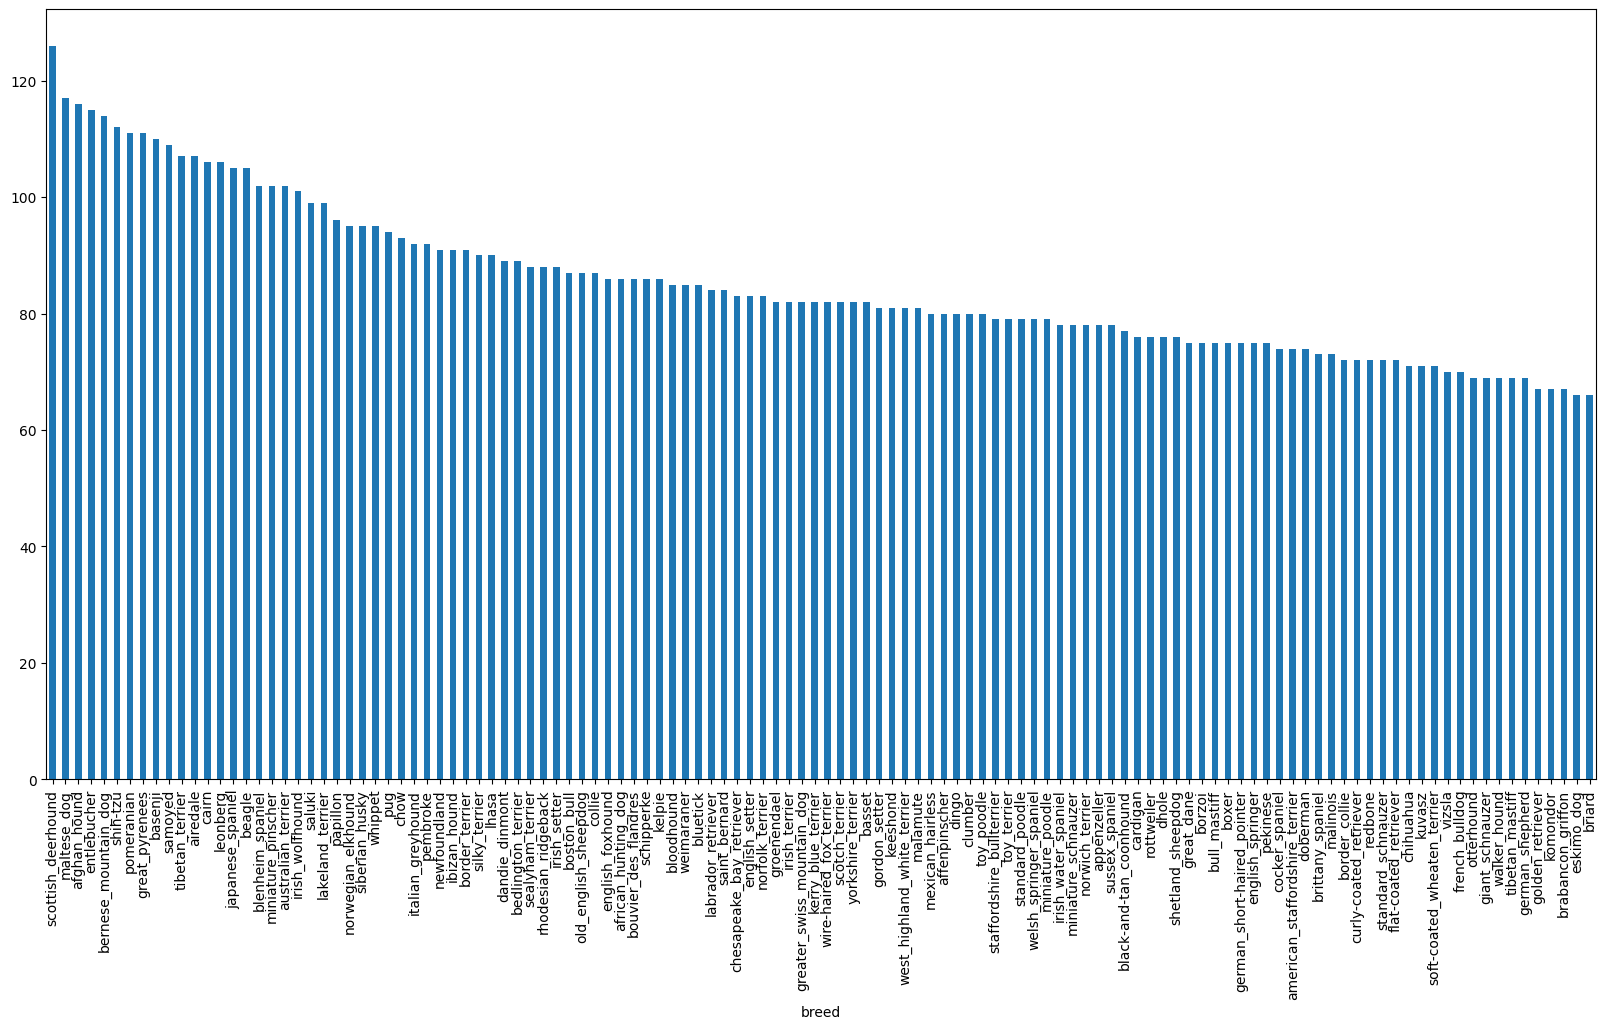

In [8]:
# How many images are there of each breed?
labels_csv["breed"].value_counts().plot.bar(figsize=(20, 10));



Okay sweet. If we were to roughly draw a line across the middle of the graph, we'd see there's about 60+ images for each dog breed.

This is a good amount as for some of their vision products Google recommends a minimum of 10 images per class to get started. And as you might imagine, the more images per class available, the more chance a model has to figure out patterns between them.

Let's check out one of the images.

**Note:** Loading an image file for the first time may take a while as it gets loaded into the runtime memory. If you see a Google Drive timeout error, check out the Colab FAQ for more.


In [9]:
from IPython.display import display, Image
# Image("drive/My Drive/Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg


Getting images and their labels

Since we've got the image ID's and their labels in a DataFrame (labels_csv), we'll use it to create:

   * A list a filepaths to training images
   * An array of all labels
   * An array of all unique labels

We'll only create a list of filepaths to images rather than importing them all to begin with. This is because working with filepaths (strings) is much efficient than working with images.


In [10]:
# Create pathnames from image ID's
filenames = ["drive/My Drive/Data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

['drive/My Drive/Data/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 'drive/My Drive/Data/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 'drive/My Drive/Data/train/001cdf01b096e06d78e9e5112d419397.jpg',
 'drive/My Drive/Data/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 'drive/My Drive/Data/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 'drive/My Drive/Data/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 'drive/My Drive/Data/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 'drive/My Drive/Data/train/002a283a315af96eaea0e28e7163b21b.jpg',
 'drive/My Drive/Data/train/003df8b8a8b05244b1d920bb6cf451f9.jpg',
 'drive/My Drive/Data/train/0042188c895a2f14ef64a918ed9c7b64.jpg']



Now we've got a list of all the filenames from the ID column of labels_csv, we can compare it to the number of files in our training data directory to see if they line up.

If they do, great. If not, there may have been an issue when unzipping the data (what we did above), to fix this, you might have to unzip the data again. Be careful not to let your Colab notebook disconnect whilst unzipping.


In [12]:
# Check whether number of filenames matches number of actual image files
import os
if len(os.listdir("drive/MyDrive/Colab Notebooks/Dog vision/Data/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

Filenames match actual amount of files!




If everything worked, we should see a match up.

Let's do one more check. Visualizing directly from a filepath.


Filenames match actual amount of files!


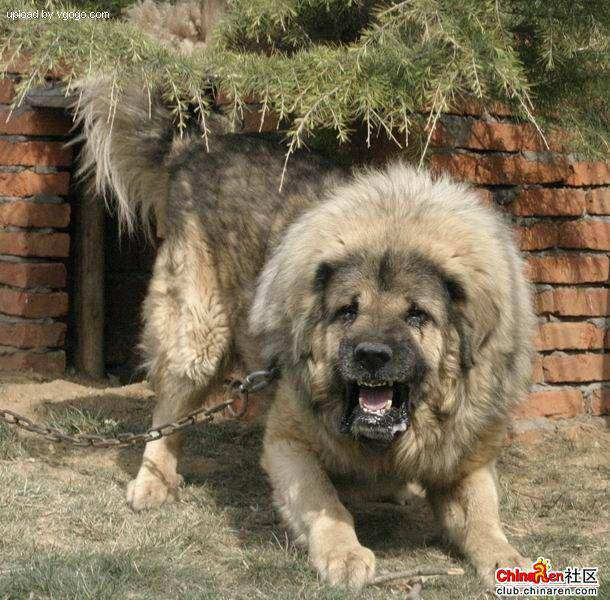

In [16]:
# Check an image directly from a filepath
# Image(filenames[9000])
# this code error
# Create pathnames from image ID's
# Make sure the directory path is correct
filenames = ["drive/MyDrive/Colab Notebooks/Dog vision/Data/train/" + fname + ".jpg" for fname in labels_csv["id"]]

# Check the first 10 filenames
filenames[:10]

# Check whether number of filenames matches number of actual image files
import os
# Use the same directory as above
if len(os.listdir("drive/MyDrive/Colab Notebooks/Dog vision/Data/train/")) == len(filenames):
  print("Filenames match actual amount of files!")
else:
  print("Filenames do not match actual amount of files, check the target directory.")

# Check an image directly from a filepath
from IPython.display import Image
Image(filename=filenames[9000]) # Use filename keyword argument



Woah! What a beast!

Now we've got our image filepaths together, let's get the labels.

We'll take them from labels_csv and turn them into a NumPy array.


In [17]:
import numpy as np
labels = labels_csv["breed"].to_numpy() # convert labels column to NumPy array
labels[:10]

array(['boston_bull', 'dingo', 'pekinese', 'bluetick', 'golden_retriever',
       'bedlington_terrier', 'bedlington_terrier', 'borzoi', 'basenji',
       'scottish_deerhound'], dtype=object)

In [19]:
# See if number of labels matches the number of filenames
if len(labels) == len(filenames):
  print("Number of labels matches number of filenames!")
else:
  print("Number of labels does not match number of filenames, check data directories.")

Number of labels matches number of filenames!




Number of labels matches number of filenames!

  If it all worked, we should have the same amount of images and labels.

  Finally, since a machine learning model can't take strings as input (what labels currently is), we'll have to convert our labels to numbers.

  To begin with, we'll find all of the unique dog breed names.

  Then we'll go through the list of labels and compare them to unique breeds and create a list of booleans indicating which one is the real label (True) and which ones aren't (False).


In [20]:
# Find the unique label values
unique_breeds = np.unique(labels)
len(unique_breeds)

120



The length of unique_breeds should be 120, meaning we're working with images of 120 different breeds of dogs.

Now use unique_breeds to help turn our labels array into an array of booleans.


In [21]:
# Example: Turn one label into an array of booleans
print(labels[0])
labels[0] == unique_breeds # use comparison operator to create boolean array

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [22]:
# Turn every label into a boolean array
boolean_labels = [label == np.array(unique_breeds) for label in labels]
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal



Why do it like this?

Remember, an important concept in machine learning is converting your data to numbers before passing it to a machine learning model.

In this case, we've transformed a single dog breed name such as boston_bull into a one-hot array.

Let's see an example.


In [23]:
# Example: Turning a boolean array into integers
print(labels[0]) # original label
print(np.where(unique_breeds == labels[0])[0][0]) # index where label occurs
print(boolean_labels[0].argmax()) # index where label occurs in boolean array
print(boolean_labels[0].astype(int)) # there will be a 1 where the sample label occurs

boston_bull
19
19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]



### Creating our own validation set

Since the dataset from Kaggle doesn't come with a validation set (a split of the data we can test our model on before making final predicitons on the test set), let's make one.

We could use Scikit-Learn's train_test_split function or we could simply make manual splits of the data.

For accessibility later, let's save our filenames variable to X (data) and our labels to y.


In [24]:
# Setup X & y variables
X = filenames
y = boolean_labels



Since we're working with 10,000+ images, it's a good idea to work with a portion of them to make sure things are working before training on them all.

This is because computing with 10,000+ images could take a fairly long time. And our goal when working through machine learning projects is to reduce the time between experiments.

Let's start experimenting with 1000 and increase it as we need.


In [26]:
# Set number of images to use for experimenting
NUM_IMAGES = 1000 #@param {type:"slider", min:1000, max:10000, step:1000}
NUM_IMAGES

1000

Now let's split our data into training and validation sets. We'll use and 80/20 split (80% training data, 20% validation data).

In [27]:
# Import train_test_split from Scikit-Learn
from sklearn.model_selection import train_test_split

# Split them into training and validation using NUM_IMAGES
X_train, X_val, y_train, y_val = train_test_split(X[:NUM_IMAGES],
                                                  y[:NUM_IMAGES],
                                                  test_size=0.2,
                                                  random_state=42)

len(X_train), len(y_train), len(X_val), len(y_val)

(800, 800, 200, 200)

In [28]:
# Check out the training data (image file paths and labels)
X_train[:5], y_train[:2]

(['drive/MyDrive/Colab Notebooks/Dog vision/Data/train/00bee065dcec471f26394855c5c2f3de.jpg',
  'drive/MyDrive/Colab Notebooks/Dog vision/Data/train/0d2f9e12a2611d911d91a339074c8154.jpg',
  'drive/MyDrive/Colab Notebooks/Dog vision/Data/train/1108e48ce3e2d7d7fb527ae6e40ab486.jpg',
  'drive/MyDrive/Colab Notebooks/Dog vision/Data/train/0dc3196b4213a2733d7f4bdcd41699d3.jpg',
  'drive/MyDrive/Colab Notebooks/Dog vision/Data/train/146fbfac6b5b1f0de83a5d0c1b473377.jpg'],
 [array([False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False,  True,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, False, False, False, False, False, False, False,
         False, False, Fa


### Preprocessing images (turning images into Tensors)

Our labels are in numeric format but our images are still just file paths.

Since we're using TensorFlow, our data has to be in the form of Tensors.

A Tensor is a way to represent information in numbers. If you're familar with NumPy arrays (you should be), a Tensor can be thought of as a combination of NumPy arrays, except with the special ability to be used on a GPU.

Because of how TensorFlow stores information (in Tensors), it allows machine learning and deep learning models to be run on GPUs (generally faster at numerical computing).

To preprocess our images into Tensors we're going to write a function which does a few things:

    1. Takes an image filename as input.
    2. Uses TensorFlow to read the file and save it to a variable, image.
    3. Turn our image (a jpeg file) into Tensors.
    4. Resize the image to be of shape (224, 224).
    5. Return the modified image.

A good place to read about this type of function is the TensorFlow documentation on loading images.

You might be wondering why (224, 224), which is (heigh, width). It's because this is the size of input our model (we'll see this soon) takes, an image which is (224, 224, 3).

What? Where's the 3 from? We're getting ahead of ourselves but that's the number of colour channels per pixel, red, green and blue.

Let's make this a little more concrete.


In [29]:
# Convert image to NumPy array
from matplotlib.pyplot import imread
image = imread(filenames[42]) # read in an image
image.shape

(257, 350, 3)



Notice the shape of image. It's (257, 350, 3). This is height, width, colour channel value.

And you can easily convert it to a Tensor using tf.constant().


In [30]:
tf.constant(image)[:2]

<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [31]:
# Define image size
IMG_SIZE = 224

def process_image(image_path):
  """
  Takes an image file path and turns it into a Tensor.
  """
  # Read in image file
  image = tf.io.read_file(image_path)
  # Turn the jpeg image into numerical Tensor with 3 colour channels (Red, Green, Blue)
  image = tf.image.decode_jpeg(image, channels=3)
  # Convert the colour channel values from 0-225 values to 0-1 values
  image = tf.image.convert_image_dtype(image, tf.float32)
  # Resize the image to our desired size (224, 244)
  image = tf.image.resize(image, size=[IMG_SIZE, IMG_SIZE])
  return image

### Creating data batches

Wonderful. Now we've got a function to convert our images into Tensors, we'll now build one to turn our data into batches (more specifically, a TensorFlow BatchDataset).

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of process_image function at the same time.
